# Problem Set 5
## Forecasting/Predictive Analysis 


--------------------------------

#### **Name: Sherry Peng Tian** 
#### **Date: Dec. 12, 2019** 



### Hyndman Book Chapter 8.11 
### Exercise 1 

In [1]:
# Set up and install packages 
library(ggplot2)
library(fpp2)
library(seasonal)

Loading required package: forecast
Warning message:
“package ‘forecast’ was built under R version 3.5.2”Loading required package: fma
Loading required package: expsmooth


* 1.a: There exists white noise with the data. The difference between the datasets is the sample size, resulting in the difference of the ACF graphs. 


* 1.b: Why are the critical values at different distances from the mean of zero? Why are the autocorrelations different in each figure when they each refer to white noise? 

The critical value represents the standard errors/residuals from the mean of zero, due to the difference in sample size. Therefore, with the sample sizing increase, the residuals representing each outlier in the autocorrelation graph become smaller. 

### Exercise 3

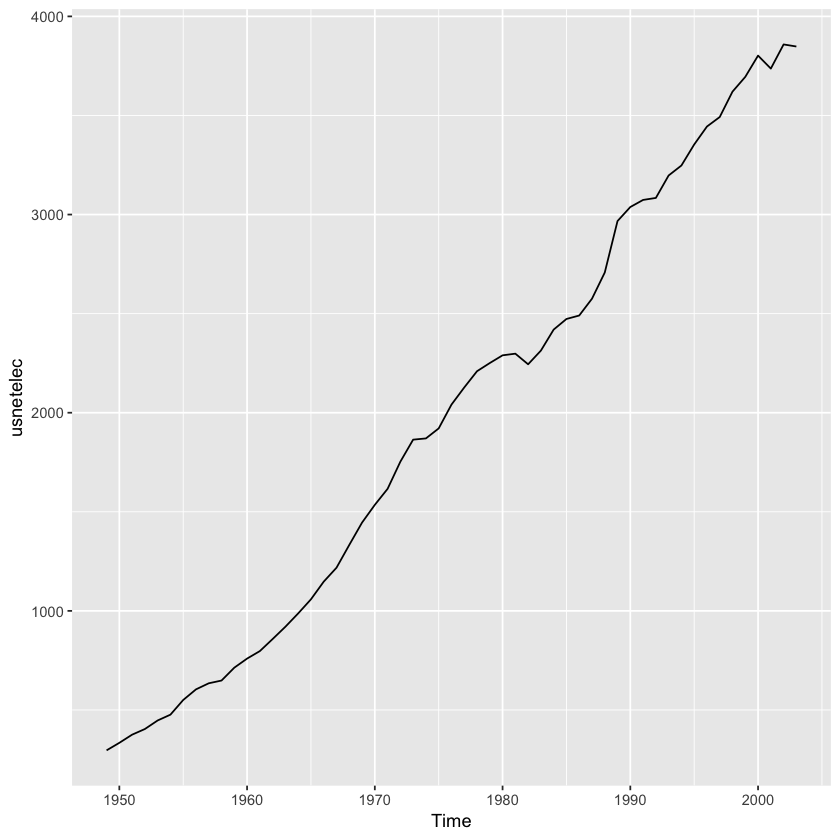

In [2]:
# a. 
autoplot(usnetelec)
lambda_usnetelec <- BoxCox.lambda(usnetelec)

Warning message:
“Ignoring unknown parameters: facets”

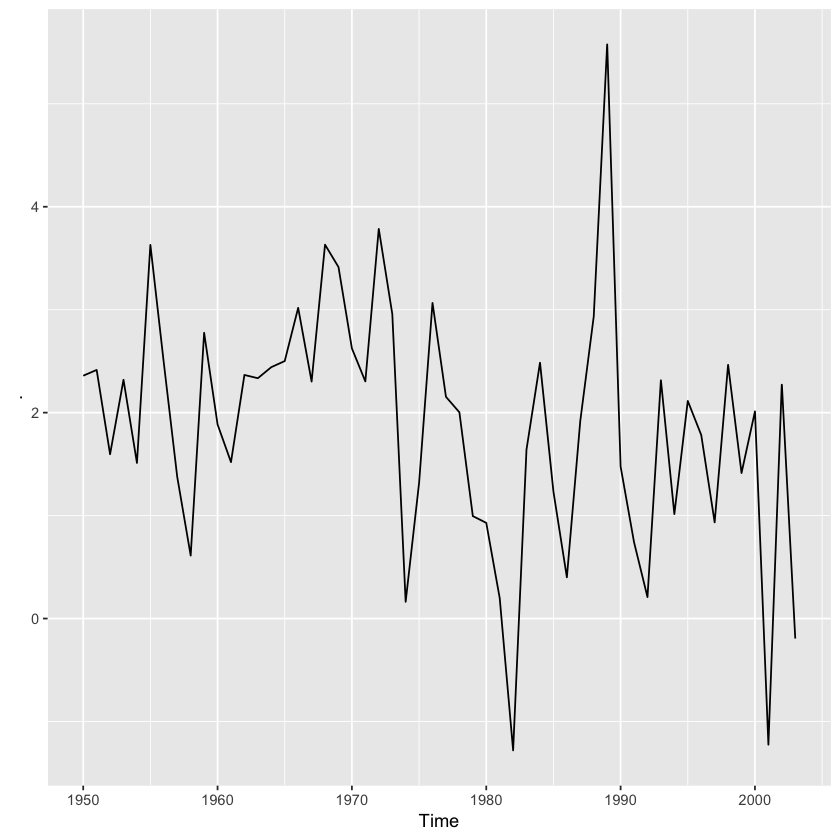

In [3]:
usnetelec %>% 
    BoxCox(lambda_usnetelec) %>% 
    diff() %>% 
    autoplot(facets = TRUE)

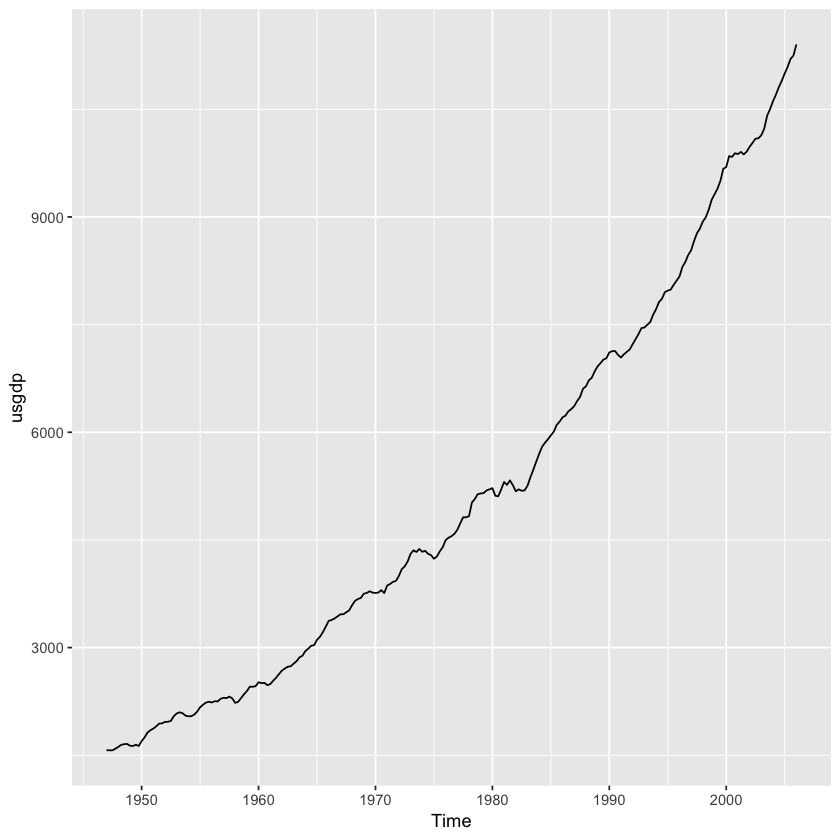

In [4]:
# b. 
autoplot(usgdp)
lambda_usgdp <- BoxCox.lambda(usgdp)

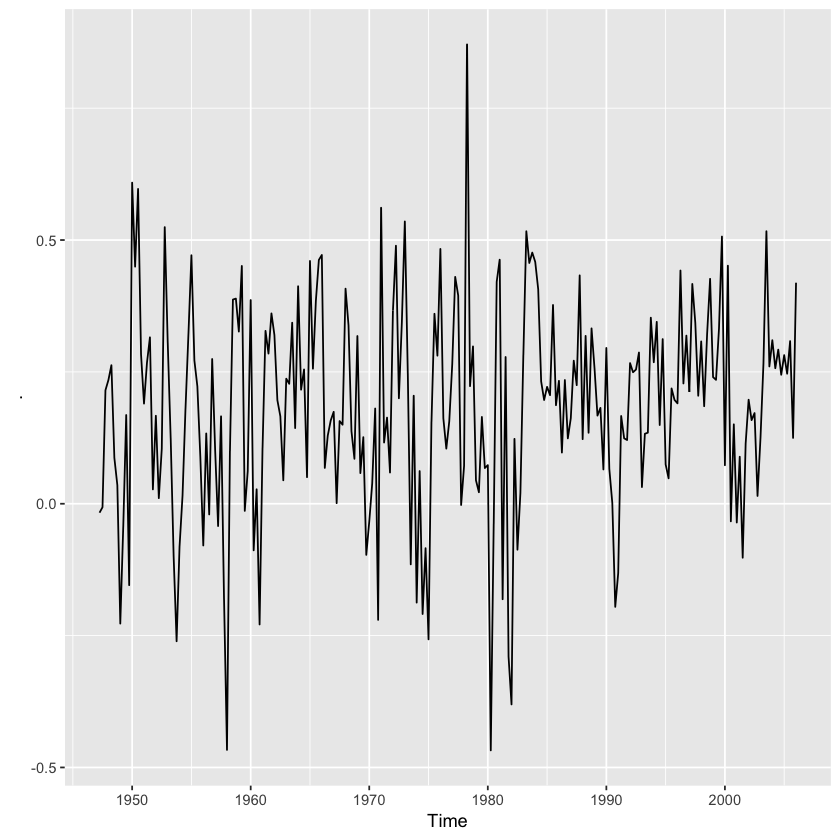

In [5]:
usgdp %>% 
    BoxCox(lambda_usgdp) %>% 
    diff() %>% 
    autoplot()

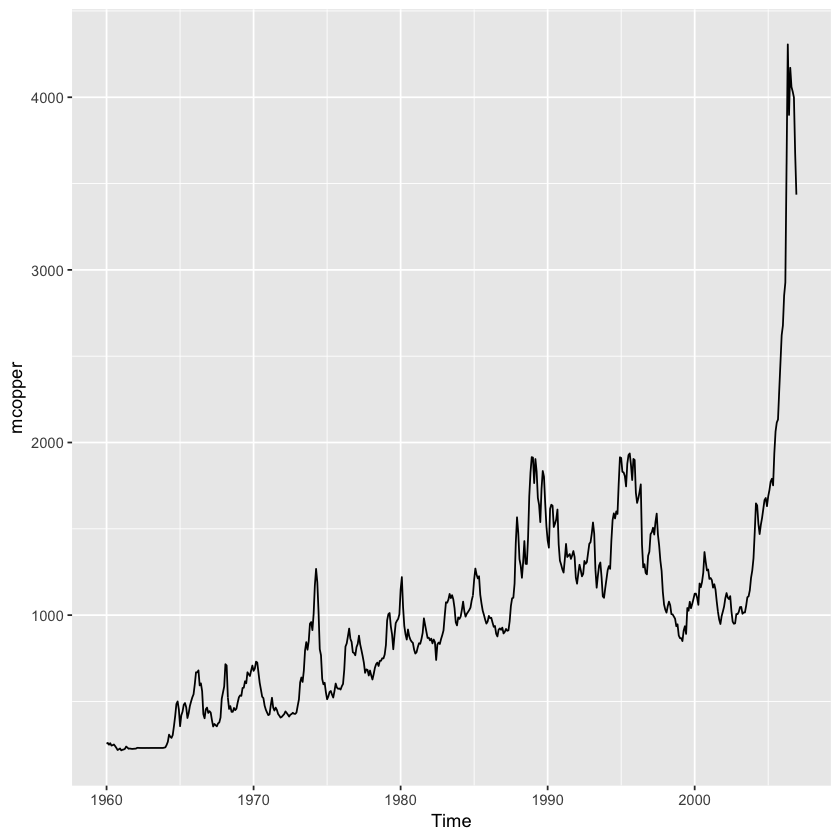

In [6]:
# c. 
autoplot(mcopper)
lambda_mcopper <- BoxCox.lambda(mcopper)

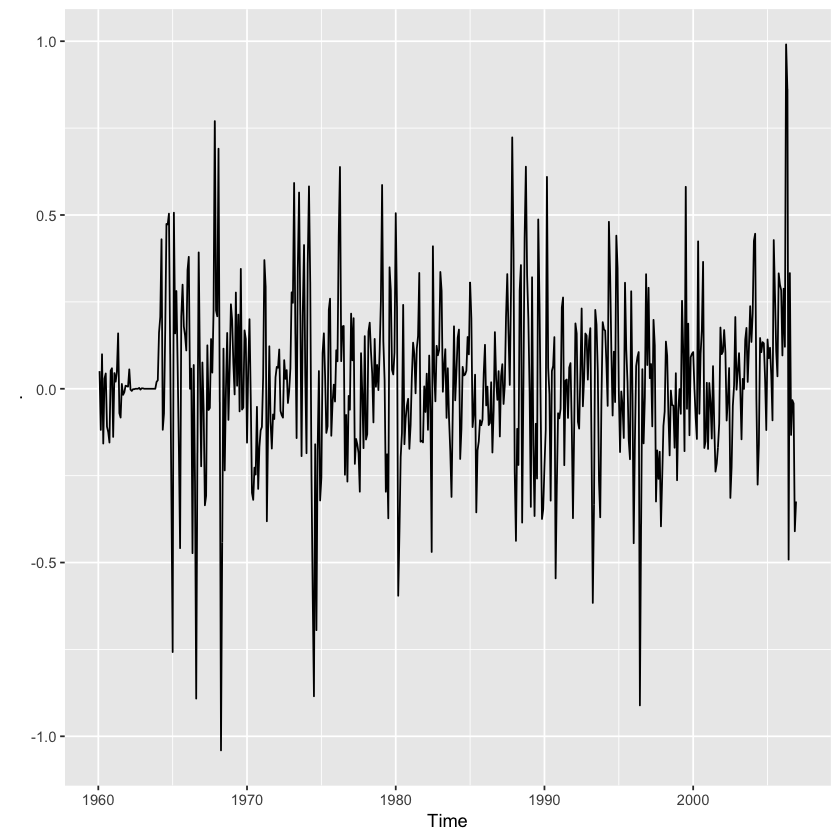

In [7]:
mcopper %>% 
    BoxCox(lambda_mcopper) %>% 
    diff() %>% 
    autoplot()

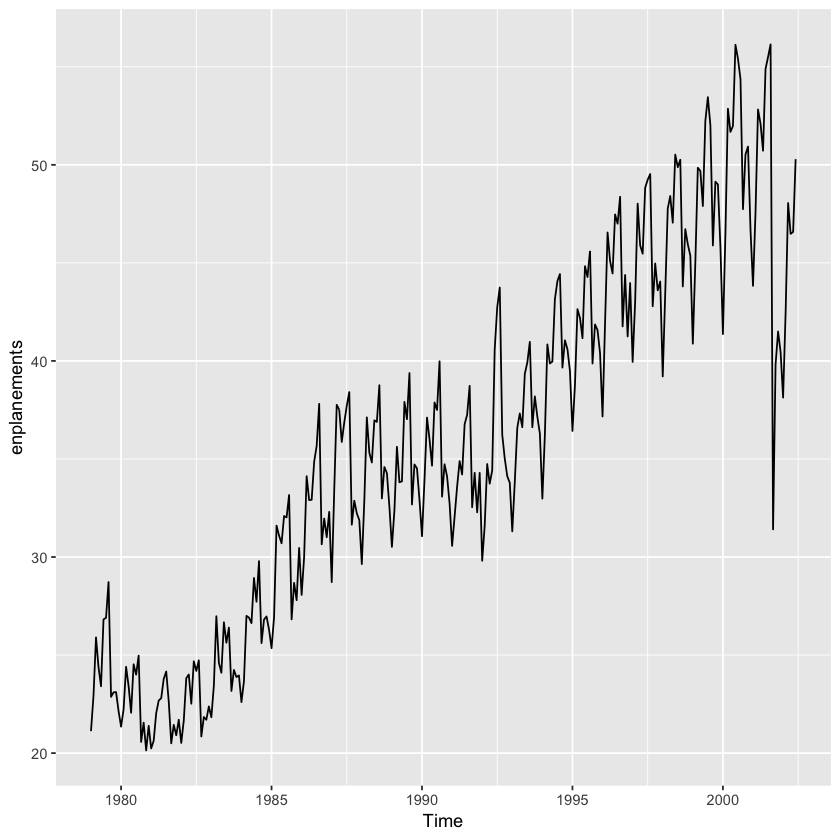

In [8]:
# d. 
autoplot(enplanements)
lambda_enplanements <- BoxCox.lambda(enplanements)

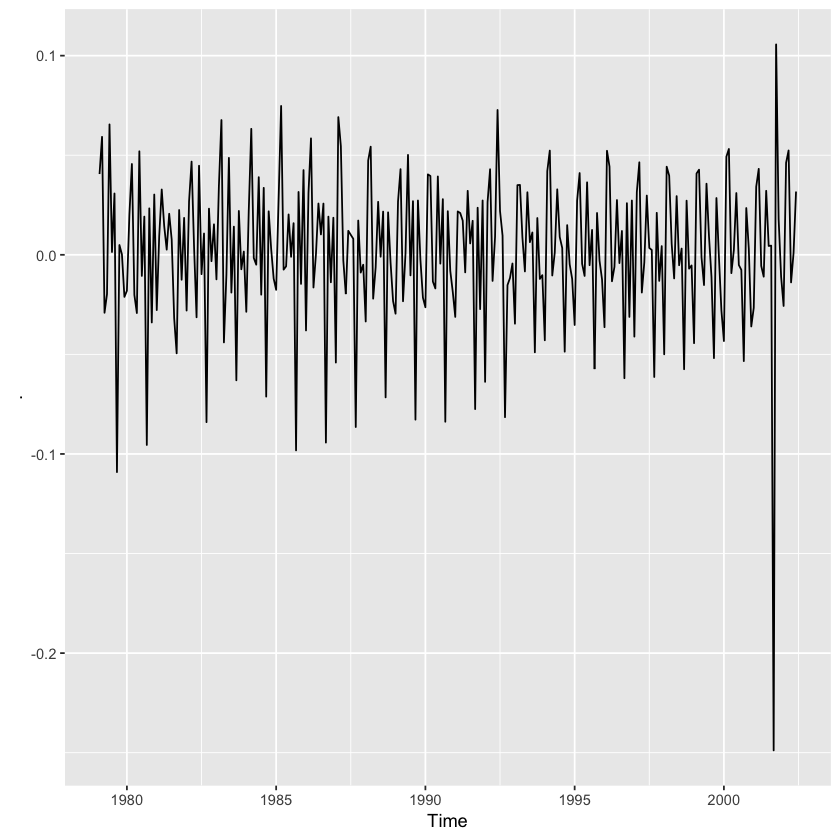

In [9]:
enplanements %>% 
    BoxCox(lambda_enplanements) %>% 
    diff() %>% 
    autoplot()

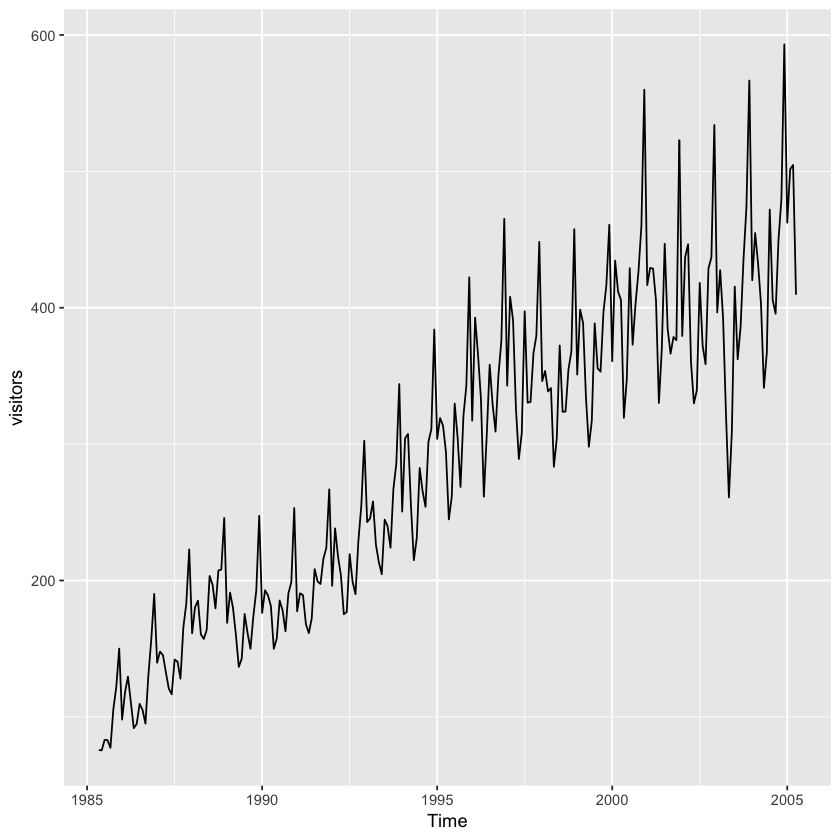

In [10]:
# e. 
autoplot(visitors)
lambda_visitor <- BoxCox.lambda(visitors)

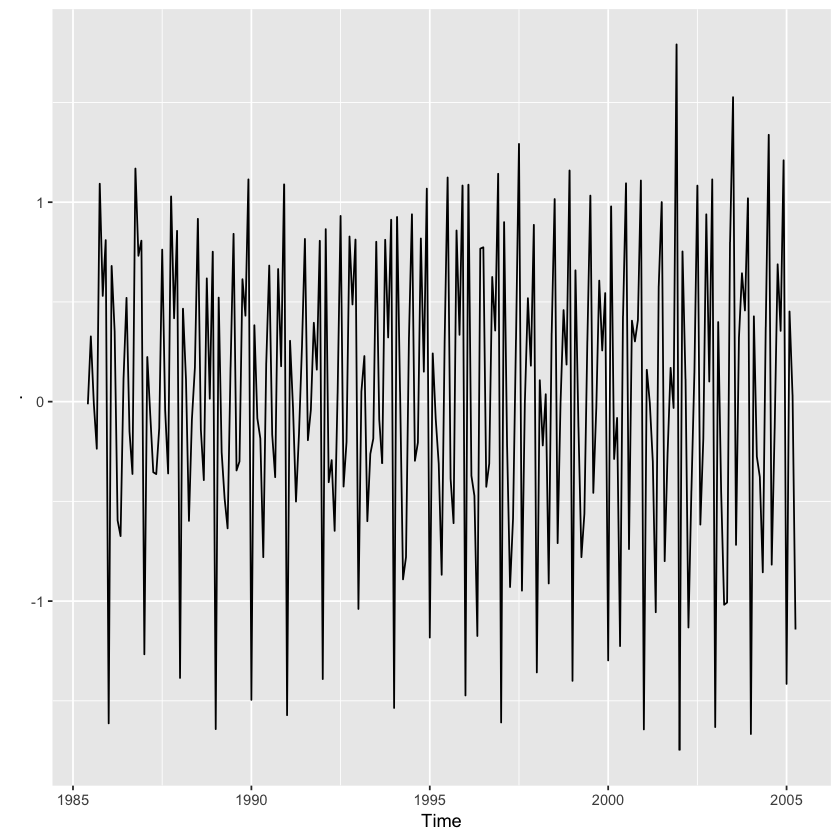

In [11]:
visitors %>% 
    BoxCox(lambda_visitor) %>% 
    diff() %>% 
    autoplot()

### Exercise 12

[1] 0.1919047

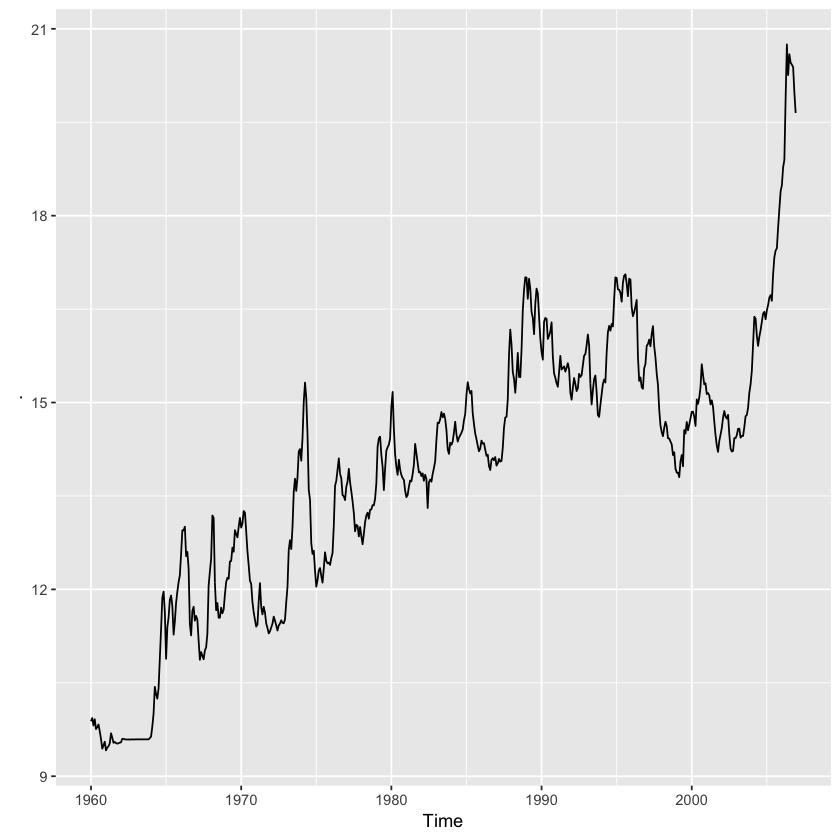

In [12]:
# a. 
mcopper %>% 
    BoxCox(lambda_mcopper) %>% 
    autoplot()
lambda_mcopper

In [13]:
# b. 
mcopper %>% 
    BoxCox(lambda_mcopper) %>% 
    auto.arima() -> mcopper_arima
summary(mcopper_arima)

Series: . 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.3720
s.e.  0.0388

sigma^2 estimated as 0.04997:  log likelihood=45.05
AIC=-86.1   AICc=-86.08   BIC=-77.43

Training set error measures:
                     ME      RMSE       MAE        MPE     MAPE      MASE
Training set 0.01254827 0.2231365 0.1592271 0.08049384 1.140225 0.1997301
                     ACF1
Training set -0.004184621


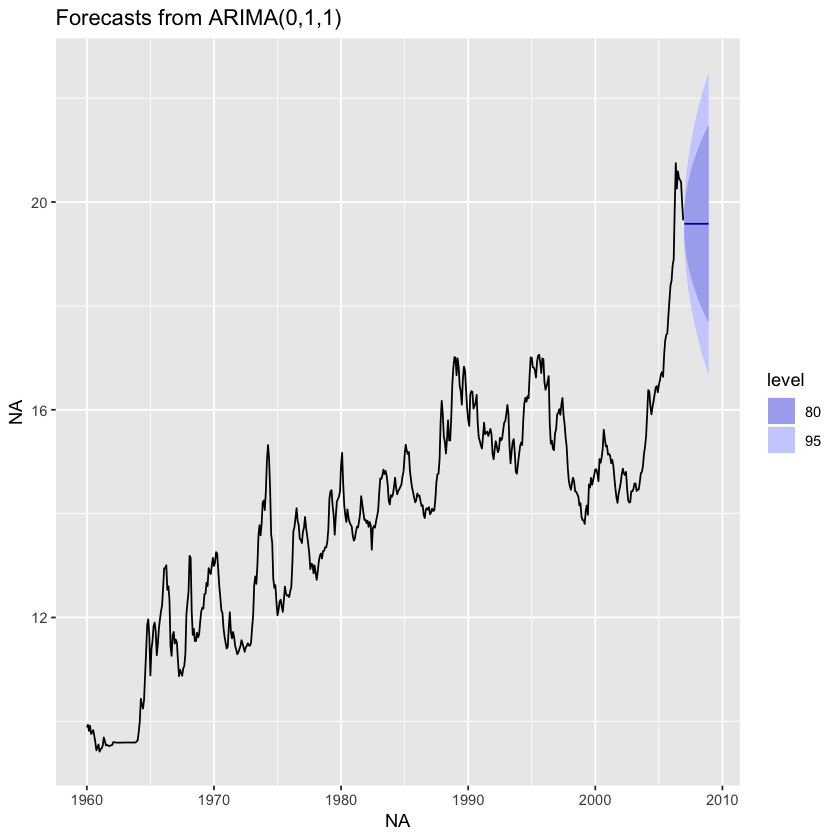

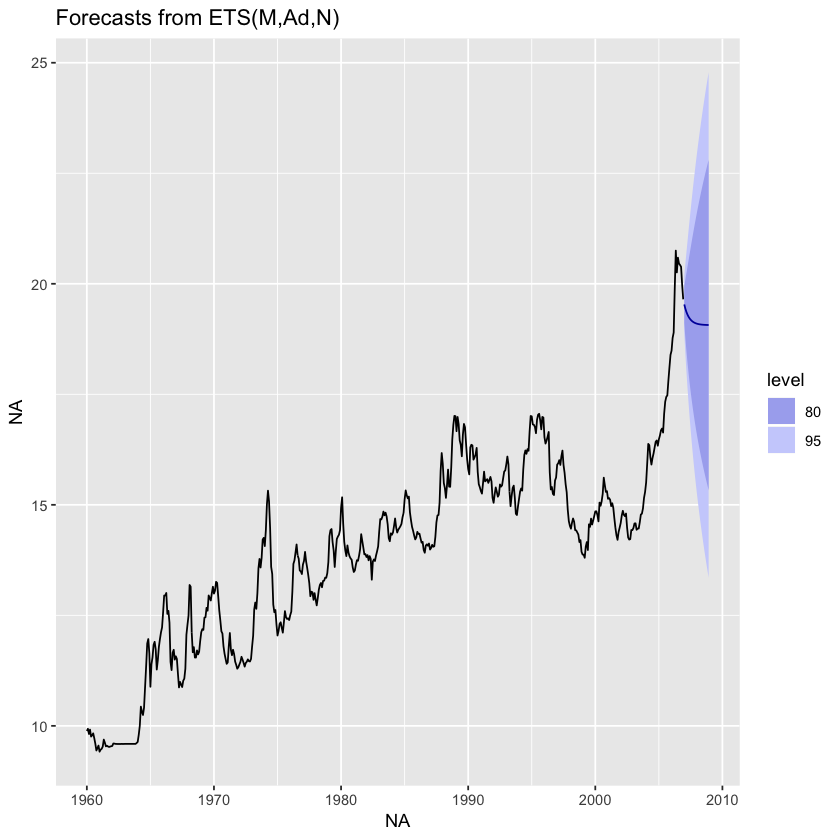

In [14]:
#c. 
mcopper_arima %>% forecast() %>% autoplot()

mcopper %>% 
    BoxCox(lambda_mcopper) %>% 
    ets() %>% 
    forecast() %>% 
    autoplot()


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 22.913, df = 23, p-value = 0.4659

Model df: 1.   Total lags used: 24



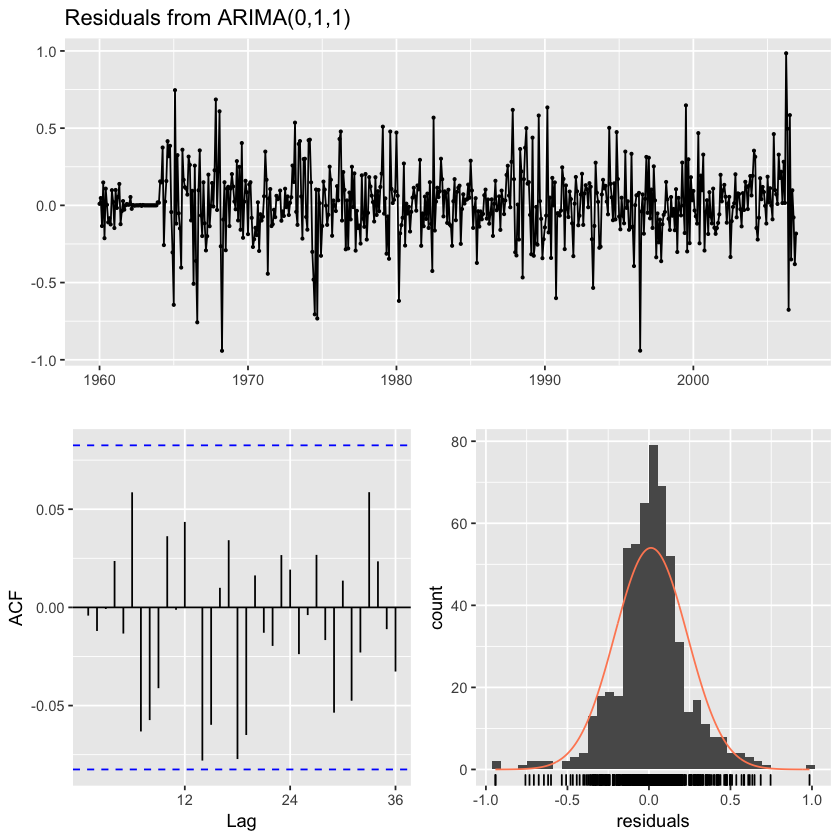

In [15]:
#d. 
checkresiduals(mcopper_arima)

In [16]:
#e. 
mcopper_arima %>% forecast()

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2007       19.58077 19.29430 19.86723 19.14265 20.01888
Feb 2007       19.58077 19.09442 20.06711 18.83696 20.32457
Mar 2007       19.58077 18.95546 20.20607 18.62445 20.53709
Apr 2007       19.58077 18.84220 20.31933 18.45123 20.71030
May 2007       19.58077 18.74414 20.41739 18.30125 20.86028
Jun 2007       19.58077 18.65642 20.50511 18.16710 20.99443
Jul 2007       19.58077 18.57633 20.58520 18.04462 21.11691
Aug 2007       19.58077 18.50218 20.65935 17.93121 21.23033
Sep 2007       19.58077 18.43280 20.72873 17.82510 21.33643
Oct 2007       19.58077 18.36738 20.79415 17.72506 21.43647
Nov 2007       19.58077 18.30532 20.85621 17.63014 21.53139
Dec 2007       19.58077 18.24614 20.91539 17.53963 21.62190
Jan 2008       19.58077 18.18947 20.97206 17.45296 21.70857
Feb 2008       19.58077 18.13502 21.02651 17.36969 21.79184
Mar 2008       19.58077 18.08255 21.07898 17.28944 21.87209
Apr 2008       19.58077 18.03186 21.1296

* e. Not reasonal because there are barely changes after the transformation. Maybe transformed `ets()` is a better way. 

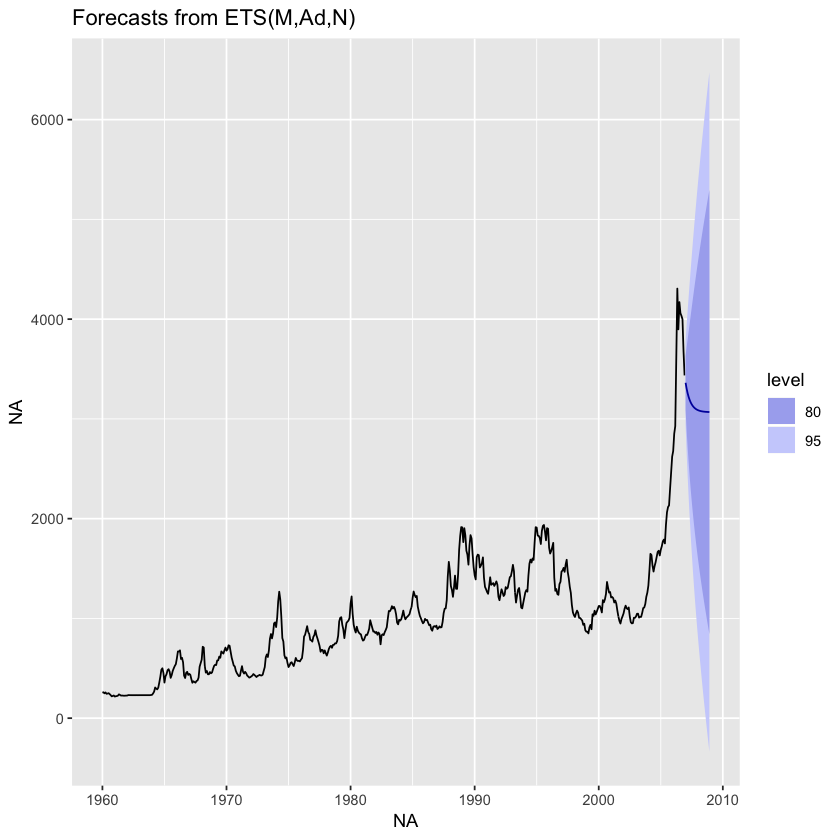

In [17]:
mcopper %>% 
    ets() %>% 
    forecast() %>% 
    autoplot()